In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-dataset/Automobile.csv


In [2]:
df=pd.read_csv("/kaggle/input/automobile-dataset/Automobile.csv")

In [3]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [7]:
df["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [8]:
df.shape

(398, 9)

In [9]:
import seaborn as sns

<Axes: ylabel='count'>

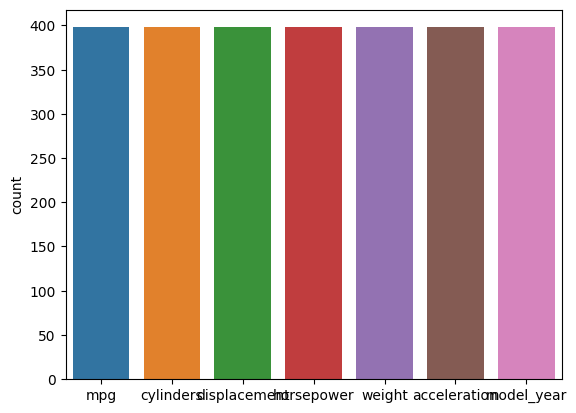

In [11]:
sns.countplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

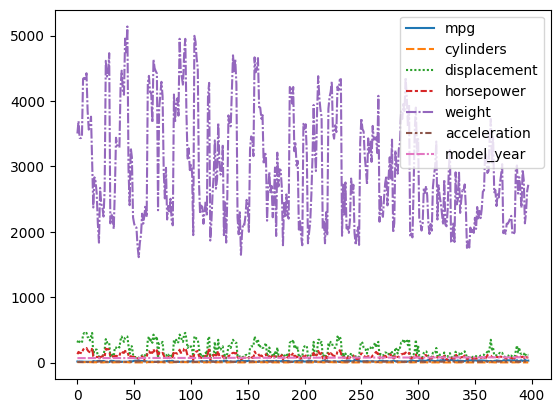

In [13]:
sns.lineplot(df)

In [14]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [15]:
df["horsepower"].mean()

104.46938775510205

In [16]:
df["horsepower"].fillna(df["horsepower"].mean(), inplace=True)

/tmp/ipykernel_33/666407550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["horsepower"].fillna(df["horsepower"].mean(), inplace=True)


In [17]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [19]:
df["name"].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [27]:
df[df["origin"].isin(["japan", "europe"])]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,70,japan
18,datsun pl510,27.0,4,97.0,88.0,2130,14.5,70,japan
19,volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,europe
20,peugeot 504,25.0,4,110.0,87.0,2672,17.5,70,europe
21,audi 100 ls,24.0,4,107.0,90.0,2430,14.5,70,europe
...,...,...,...,...,...,...,...,...,...
383,honda civic,38.0,4,91.0,67.0,1965,15.0,82,japan
384,honda civic (auto),32.0,4,91.0,67.0,1965,15.7,82,japan
385,datsun 310 gx,38.0,4,91.0,67.0,1995,16.2,82,japan
390,toyota celica gt,32.0,4,144.0,96.0,2665,13.9,82,japan


In [36]:
## removing all rows with weight>4000

df=df[~(df["weight"]>4000)]

In [37]:
df[df["weight"]>4000]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


In [38]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [39]:
df["mpg"]=df["mpg"]+3

/tmp/ipykernel_33/424365954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mpg"]=df["mpg"]+3


In [40]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,21.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,18.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,21.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,19.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,20.0,8,302.0,140.0,3449,10.5,70,usa
